# Homework part 2 : Albacore metals

Pairs:
12
13
21
23
31
32



In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

dataset_name = 'dip-har-eff.csv'
name = dataset_name.split('.csv')[0]

dataset_df = pd.read_csv("albacore_metal.csv")

# Gather info
dataset_rows = dataset_df.shape[0]

dataset_df = dataset_df.values
dataset_df = dataset_df[np.arange(0, dataset_rows), :]

dataset_X = dataset_df[:,2]
dataset_Y = dataset_df[:,3]
dataset_X_max = np.max(dataset_X)
dataset_Y_max = np.max(dataset_Y)

dataset_X = np.true_divide(dataset_X, dataset_X_max)
dataset_Y = np.true_divide(dataset_Y, dataset_Y_max)


In [51]:
# Functions
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)
    ERROR_MSE = calcMean(errorsList)  
    return ERROR_MSE

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

def calcMean(results):
    results_sum = sum(results)
    return results_sum / batchSize

# Related to R Squared Error Loss
def calc_predicted(b0, b1, data):
    predicted_vals = map(lambda x: b1*x + b0, data)
    return predicted_vals

# sum(y - mean)^2 OR sum(y hat - mean)^2
def calcSquareDiff(data):
    mean = calcMean(data)
    mean_diff = map(lambda actual: actual - mean, data)
    squared_mean_diff = map(lambda val: val**2, mean_diff)
    print(list(squared_mean_diff))
    sum_square_mean_diff = sum(squared_mean_diff)
    return sum_square_mean_diff

# sum(y hat - mean)^2 / sum(y - mean)^2
def calcRSquared(actual, predicted):
    predicted_R_square = calcSquareDiff(predicted)
    actual_R_square = calcSquareDiff(actual)
    print('predicted_R_square')
    print(predicted_R_square)
    print('actual_R_square')
    print(actual_R_square)
    print('RSquare Value: ')
    return predicted_R_square / actual_R_square

 b0: -0.476709269321 b1: 1.00824097357 Error: 0.450597124616
 b0: -0.459014509041 b1: 1.01325769497 Error: 0.43697747324
 b0: -0.445429604607 b1: 1.01591146935 Error: 0.430155494249
 b0: -0.434863681058 b1: 1.01683451494 Error: 0.426712556218
 b0: -0.426515984971 b1: 1.01649089116 Error: 0.424884309274
 b0: -0.419798723655 b1: 1.01522122227 Error: 0.42377676235
 b0: -0.414280426055 b1: 1.01327552624 Error: 0.422949566322
 b0: -0.409644367419 b1: 1.01083731252 Error: 0.422195620537
 b0: -0.405658051355 b1: 1.00804127072 Error: 0.421425342761
 b0: -0.402150808447 b1: 1.00498625478 Error: 0.42060651701
 b0: -0.398997352763 b1: 1.00174481394 Error: 0.419733491796
 b0: -0.396105711669 b1: 0.998370188724 Error: 0.41881175801
 b0: -0.393408365843 b1: 0.99490144641 Error: 0.417850496261
 b0: -0.390855745687 b1: 0.991367250564 Error: 0.416859186683
 b0: -0.388411457445 b1: 0.987788628078 Error: 0.415846238665
 b0: -0.386048778974 b1: 0.984181000267 Error: 0.414818585587
 b0: -0.383748087508 b1:

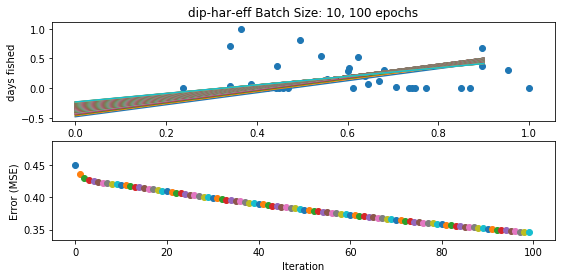

In [52]:
# Start of Regression

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10
epochs = 100

learn = 0.2

plt.figure(figsize=(9,4))

plt.subplot(211)

plt.xlabel('days fished')
plt.ylabel('days fished')
plt.title(name + ' Batch Size: ' + str(batchSize) + ', ' + str(epochs) + ' epochs')
plt.scatter(dataset_X, dataset_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dataset_X), batchSize)
sample_X = [dataset_X[i] for i in sorted(batchSample)]
sample_Y = [dataset_Y[i] for i in sorted(batchSample)]

batch_epoch_ERRORS = []
for i in range(epochs):
    ERROR = mse(dataset_X, dataset_Y, calc_total_Error)
    batch_epoch_ERRORS.append(ERROR)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

# Error Analysis with R Squared
X_max = np.max(dataset_X).item()
random_testing_vals = [random.uniform(0.0, X_max) for _ in range(batchSize)]
predicted = calc_predicted(b0,b1,random_testing_vals)
print('Tested Values for ' + str(b1) + 'x + ' + str(b0) + ': ')
print(list(predicted))
print(calcRSquared(sample_Y, list(predicted)))
   
plt.subplot(212)
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')

# Plot for error loss
for count, value in enumerate(batch_epoch_ERRORS):
    plt.scatter(count,value)

plt.show()